/var/folders/r6/s10ql4nx4dz67qrky4s76c900000gn/T/ipykernel_29442/3667564417.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Example 1
Outputs: -6.46 -6.52 -4.11 -4.83 -6.62 -7.43 -10.81 -0.05 -6.29 -4.21
Prediction: 7 Correct label: 7
Example 2
Outputs: -0.09 -6.59 -3.20 -6.01 -6.77 -6.05 -4.89 -5.48 -4.67 -4.20
Prediction: 0 Correct label: 0
Example 3
Outputs: -5.49 -3.97 -5.24 -3.65 -2.27 -4.69 -8.47 -1.34 -4.27 -0.58
Prediction: 9 Correct label: 9
Example 4
Outputs: -7.36 -5.84 -5.17 -0.07 -6.51 -3.77 -8.39 -5.51 -4.73 -3.94
Prediction: 3 Correct label: 3
Example 5
Outputs: -4.12 -0.50 -3.00 -3.45 -2.61 -4.11 -4.41 -2.10 -3.50 -3.19
Prediction: 1 Correct label: 1
Example 6
Outputs: -3.74 -5.35 -5.38 -4.68 -4.87 -3.48 -0.10 -8.52 -4.40 -6.27
Prediction: 6 Correct label: 6
Example 7
Outputs: -4.88 -7.13 -3.41 -3.41 -5.88 -4.25 -8.49 -0.15 -5.45 -3.09
Prediction: 7 Correct label: 7
Example 8
Outputs: -5.17 -7.52 -4.01 -4.27 -6.70 -5.77 -9.71 -0.09 -6.02 -3.28
Prediction: 7 Correct label: 7
Example 9
Outputs: -4.22 -5.45 -4.22 -4.62 -3.54 -3.91 -7.34 -0.22 -5.21 -2.33
Prediction: 7 Correct label: 7


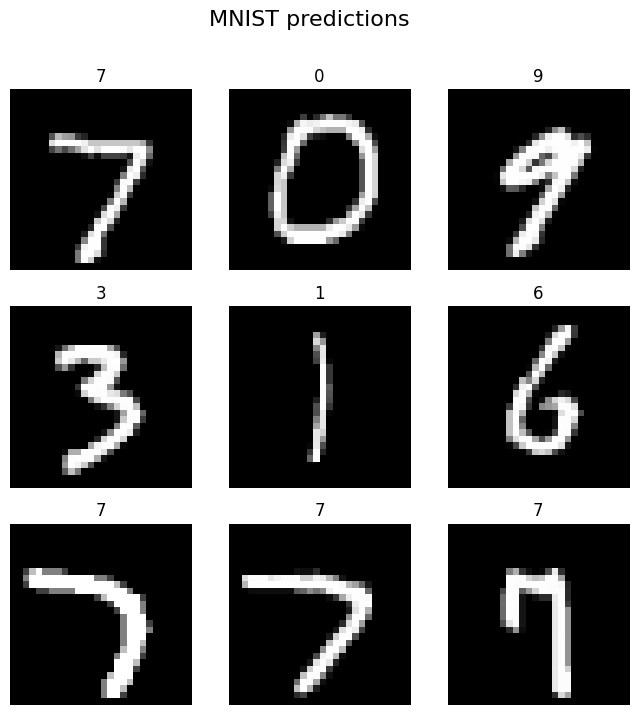

In [8]:
#  Created by SHIRISH KISHORE KUMAR & SOORYA
#  Created on 04/10/2023
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

#Reference:
#https://nextjournal.com/gkoehler/pytorch-mnist
#Creating the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Reference:
        #https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
        self.mnist_net =nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(10, 20, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(320, 50),
        nn.ReLU(),
        nn.Linear(50, 10),
        )

    def forward(self, x):
        x = self.mnist_net(x)
        return F.log_softmax(x)

#Transforming the data
#Reference:
#https://pytorch.org/vision/stable/auto_examples/plot_transforms.html
transform = transforms.Compose([transforms.ToTensor()])
#Loading the test data
test_set =  datasets.MNIST(root='./tmp/', train=False, download=True, transform=transform)
#Creating the test loader
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=False)
#Loading the model
state_dict = torch.load('/Users/shirish/trained model/model.pth')
model = Net()
#Loading the state dictionary
#Reference:
#https://nextjournal.com/gkoehler/pytorch-mnist
model.load_state_dict(state_dict)
#setting to evaluation mode
model.eval()
#Defining the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#Plotting the images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('MNIST predictions', fontsize=16)
#Iterating through the test loader
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        #getting the outputs
        outputs = model(images)
        #getting the predicted outputs
        _, predicted = torch.max(outputs.data, 1)
        #converting to numpy
        images = images.numpy()
        labels = labels.numpy()
        predicted = predicted.numpy()
        #printing the outputs
        print('Example', i+1)
        print('Outputs:', ' '.join(['%.2f' % output for output in outputs[0].tolist()]))
        print('Prediction:', classes[predicted[0]], 'Correct label:', classes[labels[0]])
        #Plotting the images
        row = i // 3
        col = i % 3
        axes[row, col].imshow(np.squeeze(images[0]), cmap='gray')
        axes[row, col].set_title(classes[predicted[0]])
        axes[row, col].axis('off')

        #Stopping after 8 images
        if i == 8:
            break

plt.show()


/var/folders/r6/s10ql4nx4dz67qrky4s76c900000gn/T/ipykernel_29442/1136067742.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Example 1
Outputs: -0.01 -14.11 -8.01 -11.28 -9.25 -9.68 -6.53 -13.70 -9.17 -4.68
Prediction: 0
Outputs: -11.97 -0.00 -6.22 -6.86 -11.45 -7.66 -7.56 -10.34 -9.71 -13.65
Prediction: 1
Outputs: -11.73 -7.63 -0.00 -11.17 -17.36 -20.63 -19.26 -10.58 -11.76 -16.42
Prediction: 2
Outputs: -18.97 -13.65 -10.94 -0.00 -12.08 -10.48 -19.23 -13.33 -9.13 -11.25
Prediction: 3
Outputs: -17.37 -14.71 -9.70 -9.59 -0.01 -11.20 -17.00 -10.03 -8.83 -4.97
Prediction: 4
Outputs: -9.38 -16.49 -7.66 -3.85 -14.59 -0.04 -10.33 -4.29 -6.76 -7.97
Prediction: 5
Outputs: -10.89 -18.69 -10.59 -10.88 -10.84 -0.58 -0.83 -21.38 -5.63 -14.27
Prediction: 5
Outputs: -14.01 -4.28 -4.63 -5.52 -9.47 -14.82 -18.23 -0.03 -7.58 -9.17
Prediction: 7
Outputs: -11.72 -10.57 -3.92 -1.06 -11.11 -8.75 -15.75 -5.67 -0.46 -9.20
Prediction: 8
Outputs: -17.78 -20.78 -13.23 -7.17 -12.99 -9.90 -24.83 -15.11 -7.28 -0.00
Prediction: 9


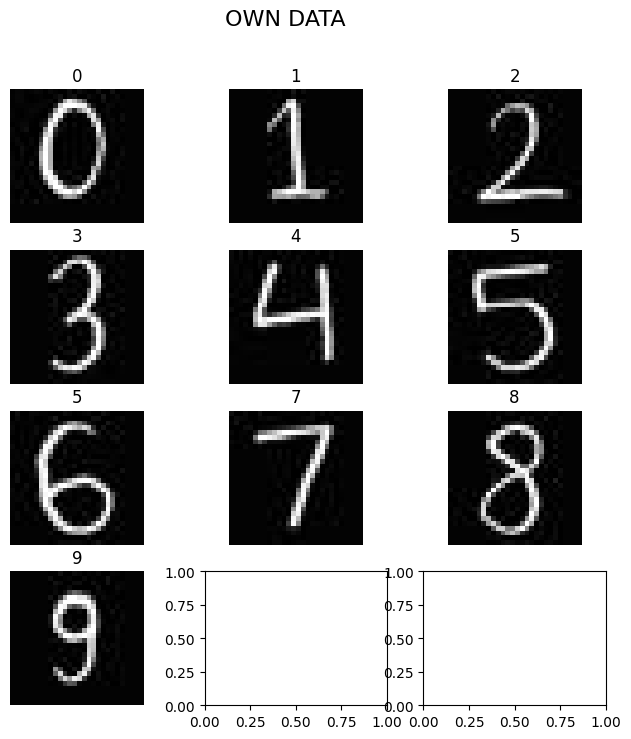

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

#Reference:
#https://nextjournal.com/gkoehler/pytorch-mnist
batch_size = 10
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Reference:
        #https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
        self.mnist_net =nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(10, 20, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(320, 50),
        nn.ReLU(),
        nn.Linear(50, 10),
        )
    #Forward pass
    def forward(self, x):
        x = self.mnist_net(x)
        return F.log_softmax(x)
#Transforming the data
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#loding the model
state_dict = torch.load('/Users/shirish/trained model/model.pth')
#Creating the model
model = Net()
#Loading the state dictionary
model.load_state_dict(state_dict)
#Setting to evaluation mode
model.eval()
#Loading the test data
custom_images = datasets.ImageFolder('/Users/shirish/own_data', transform=transform)
#Defining the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#Creating the test loader
test_loader = torch.utils.data.DataLoader(custom_images, batch_size=batch_size, shuffle=False)
#Plotting the images
num_images = len(custom_images)
num_rows = (num_images + 2) // 3
num_cols = min(num_images, 3)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
fig.suptitle('OWN DATA', fontsize=16)

#Iterating through the test loader
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        #getting the outputs
        outputs = model(images)
        #getting the predicted outputs
        _, predicted = torch.max(outputs.data, 1)
        #converting to numpy
        images = images.numpy()
        labels = labels.numpy()
        predicted = predicted.numpy()
        #printing the outputs
        print('Example', i+1)
        for j in range(len(images)):
            print('Outputs:', ' '.join(['%.2f' % output for output in outputs[j].tolist()]))
            print('Prediction:', classes[predicted[j]])

        #Plotting the images
        for j in range(len(images)):
            row = (i*10+j) // num_cols
            col = (i*10+j) % num_cols
            axes[row, col].imshow(np.squeeze(images[j]), cmap='gray')
            axes[row, col].set_title(classes[predicted[j]])
            axes[row, col].axis('off')

        #Stopping after len(images) images
        if i*batch_size >= num_images:
            break
for i in range(num_rows*num_cols, num_images):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()
